In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler


from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("scikit-learn version used:", sklearn.__version__)

scikit-learn version used: 1.5.2


In [ ]:
data = pd.read_csv("yield_df.csv", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'yield_df.csv'

In [ ]:
data.shape

(28242, 7)

In [ ]:
data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data2 = gpd.read_file(geojson_url)

merged_data = data2.merge(data, left_on='NAME', right_on='Area', how='left')

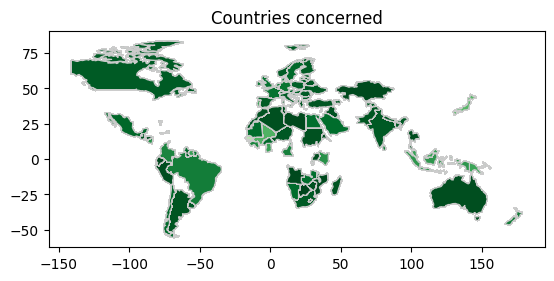

In [ ]:
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
plt.title("Countries concerned")
plt.show()

In [ ]:
data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
data.tail()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [ ]:
data.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
data["Item"].value_counts()

,count
Item,
Potatoes,4276
Maize,4121
Wheat,3857
"Rice, paddy",3388
Soybeans,3223
Sorghum,3039
Sweet potatoes,2890
Cassava,2045
Yams,847


In [ ]:
data.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [ ]:
data.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

,hg/ha_yield
Area,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


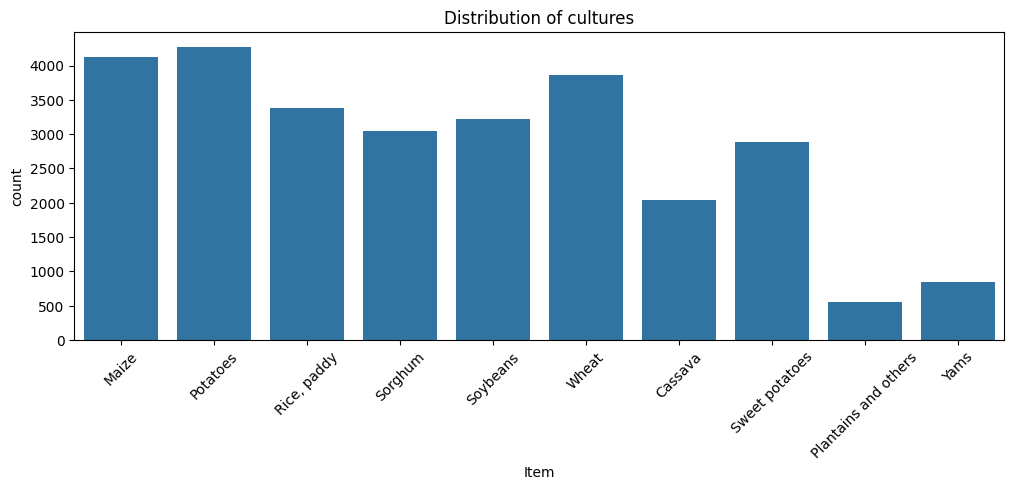

In [ ]:
plt.figure(figsize=(12,4))
g1 = sns.countplot(data=data, x='Item')

g1.set_title("Distribution of cultures")
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
data['Area'].nunique()

101

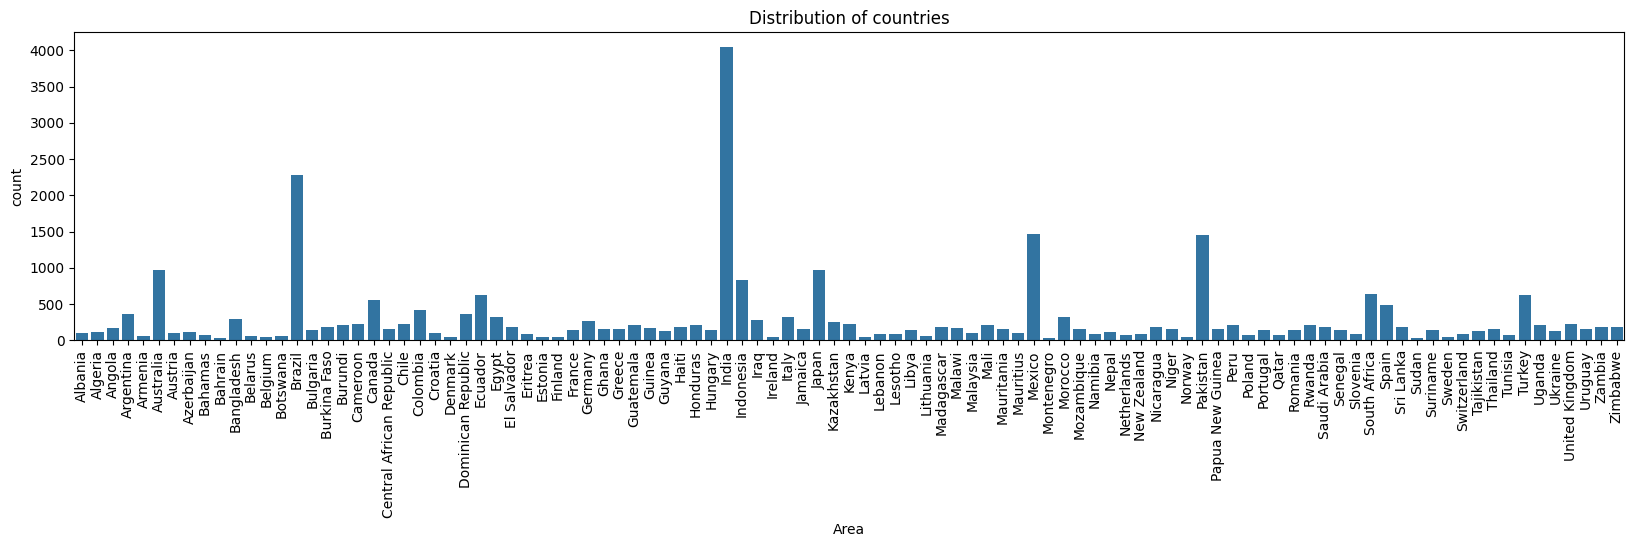

In [ ]:
plt.figure(figsize=(20,4))
g2 = sns.countplot(data=data, x='Area')
g2.set_title("Distribution of countries")

g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
plt.show()

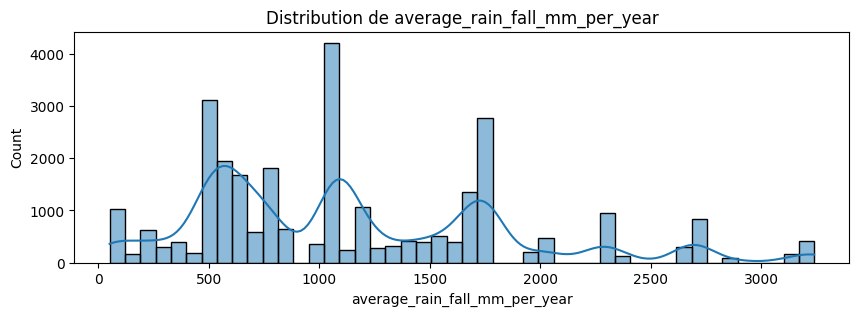

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
g1=sns.histplot(data["average_rain_fall_mm_per_year"], kde=True)
g1.set_title("Distribution de average_rain_fall_mm_per_year")
plt.show()

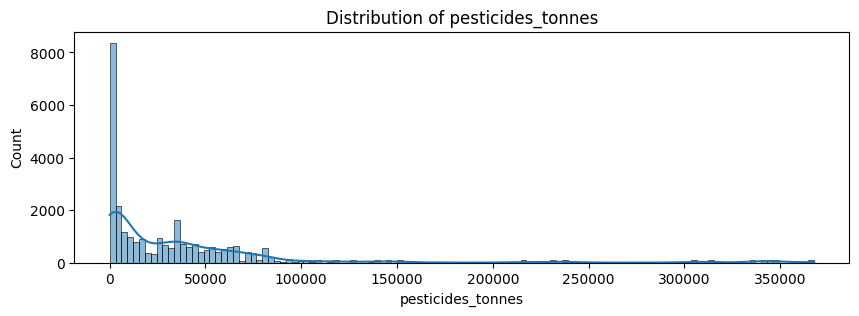

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
g2=sns.histplot(data["pesticides_tonnes"], kde=True, label='Data')
g2.set_title("Distribution of pesticides_tonnes")
plt.show()

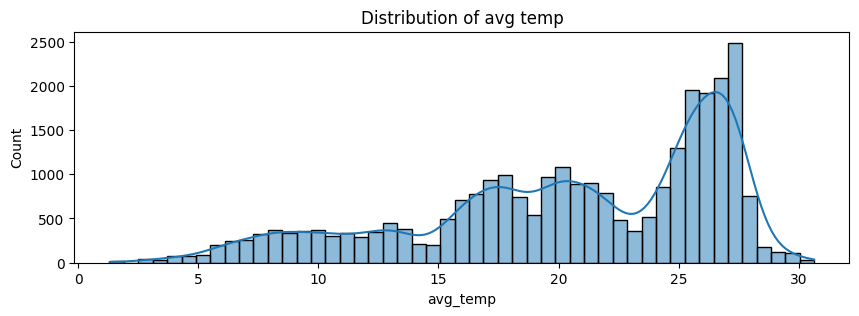

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
g3=sns.histplot(data["avg_temp"], kde=True, label='Data')
g3.set_title("Distribution of avg temp")

plt.show()

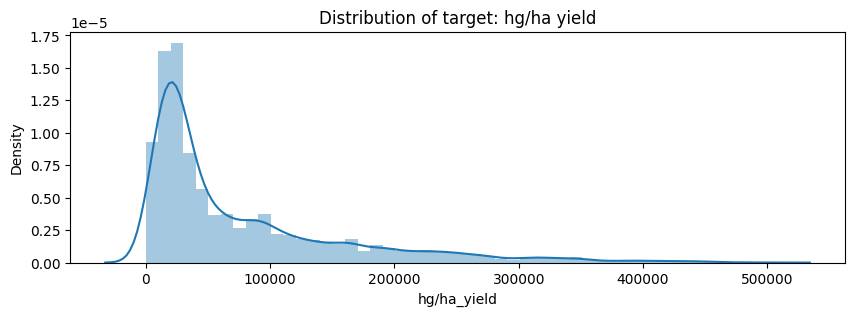

In [ ]:
plt.figure(figsize=(10, 3))
g=sns.distplot(data["hg/ha_yield"], kde=True, label='Data')
g.set_title("Distribution of target: hg/ha yield")

plt.show()

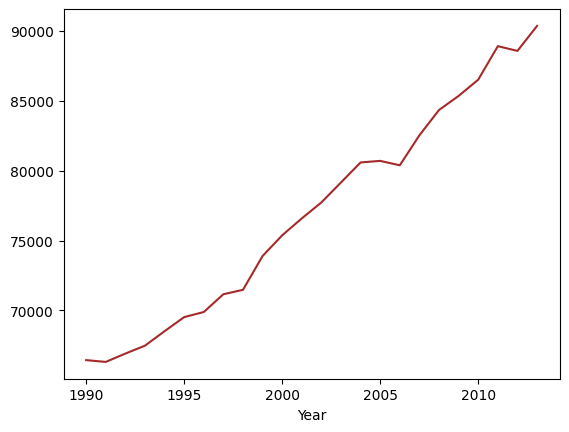

In [ ]:
data2 = data[data['Item']=='Yams']
data.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')
plt.show()

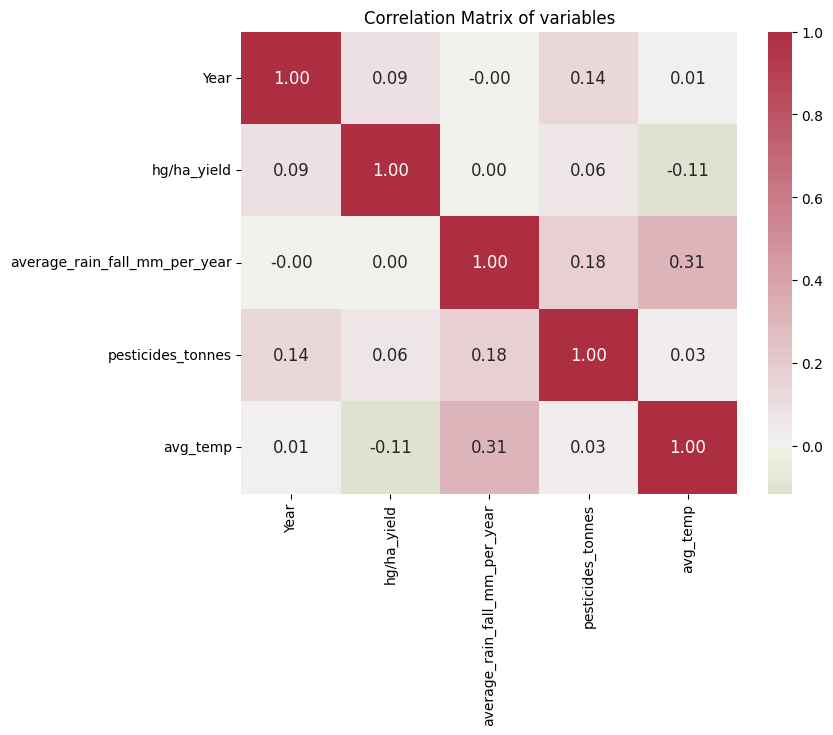

In [ ]:
matrice_corr = data.drop(['Area', 'Item'], axis=1).corr()
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

plt.figure(figsize=(8, 6))
sns.heatmap(matrice_corr, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}).set_title('Correlation Matrix of variables');

In [ ]:
# now we start the data preprocessing

In [ ]:
data_enc = pd.get_dummies(data, columns=["Area","Item"], prefix = ['Country',"Item"])

X = data_enc.loc[:, data_enc.columns != 'hg/ha_yield']
y = data['hg/ha_yield']

In [ ]:
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
X = X.drop(['Year'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [ ]:
# now we start the training

In [ ]:
scores = []

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_preds = linear_reg.predict(X_test)

In [ ]:
score = linear_reg.score(X_test, y_preds)
error_mae = mean_absolute_error(y_test, y_preds)
score_r2 = r2_score(y_test, y_preds)

print(f"Mean Absolue Error - MAE: {error_mae}")
print(f"Coeifficient R2: {score_r2}")

Mean Absolue Error - MAE: 30046.726500265533
Coeifficient R2: 0.7396703375211803


In [ ]:
scores.append(('Linear Regression', score, error_mae, score_r2))

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

y_preds = decision_tree.predict(X_test)

In [ ]:
score = linear_reg.score(X_test, y_preds)
error_mae = mean_absolute_error(y_test, y_preds)
score_r2 = r2_score(y_test, y_preds)

print(f"Error Absolue Error - MAE: {error_mae}")
print(f"Coeifficient R2: {score_r2}")

Error Absolue Error - MAE: 5836.357024842156
Coeifficient R2: 0.9592269605257219


In [ ]:
scores.append(('Decision Tree', score, error_mae , score_r2))

In [ ]:
random_f = RandomForestRegressor(n_estimators=200, max_depth=3)
random_f.fit(X_train, y_train)

y_preds = random_f.predict(X_test)

In [ ]:
score = linear_reg.score(X_test, y_preds)
error_mae = mean_absolute_error(y_test, y_preds)
score_r2 = r2_score(y_test, y_preds)

print(f"Mean Absolue Error - MAE: {error_mae}")
print(f"Coeifficient R2: {score_r2}")

Mean Absolue Error - MAE: 32805.35460299809
Coeifficient R2: 0.6768475412225805


In [ ]:
scores.append(('Random Forest', score, error_mae , score_r2))

In [ ]:
scores = pd.DataFrame(scores, columns=['Model Name', 'Scores', 'Error MAE', 'Score R2'])

In [ ]:
scores

,Model Name,Scores,Error MAE,Score R2
0,Linear Regression,1.000000,30046.726500,0.739670
1,Decision Tree,0.739848,5836.357025,0.959227
2,Random Forest,0.649209,32805.354603,0.676848


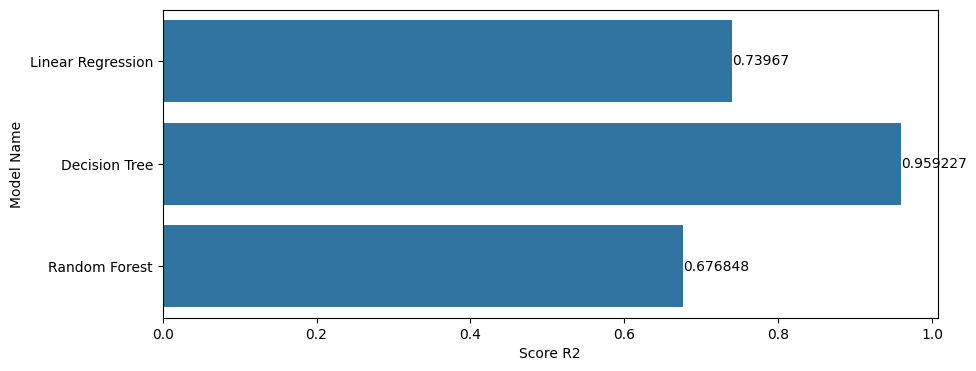

In [ ]:
plt.figure(figsize = (10, 4))
ax = sns.barplot(y = 'Model Name', x = 'Score R2', data = scores)
ax.bar_label(ax.containers[0]);

In [ ]:

# Variable	Description
# Area  = Names of countries that grow crops
# Item  = Types of crops planted
# Year	= Year of planting of crops, from 1961 to 2016
# average_rain_fall_mm_per_year = Average precipitation per year (in mm)
# pesticides_tonnes = Pesticides used in tons
# avg_temp  =  Average temperature
# hg/ha_yield	 =  Crop yield in 100gm per hectare (Hg/Ha)






# There are exactly ten (10) types of crops (Item) which are:

# Cassava
# Corn
# Plantains and others
# Potatoes
# Rice, paddy
# Sorghum
# Soybeans
# Sweet potatoes
# Wheat
# Yam
